# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [2]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

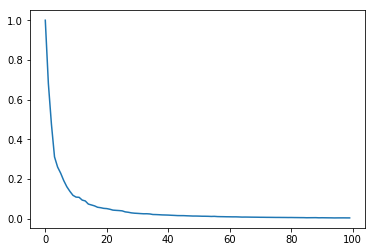

In [45]:
# Samples corresponding to the last digit of your roll number (plot a)
from numpy import linalg as LA
data = []
j = 0

data = train_data[np.where(train_labels==7)]
data = np.array(data)
# print((data))
# data = np.array(data)
#print(data.shape)
covariance_matrix = np.cov(data.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
# print(data.size)

eigen_values = np.linalg.eigvals(covariance_matrix)
eigen_values = (eigen_values-np.min(eigen_values))/(np.max(eigen_values)-np.min(eigen_values))
x = range(0,100)
plt.plot(x,eigen_values[0:100])
plt.show()

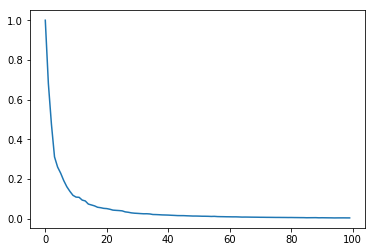

In [29]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
data = []
j = 0# print(data)
data = train_data[np.where(train_labels==7)]

data = np.array(data)
covariance_matrix = np.cov(data.T)
eigen_values = np.linalg.eigvals(covariance_matrix)
eigen_values = (eigen_values-np.min(eigen_values))/(np.max(eigen_values)-np.min(eigen_values))
x = range(0,100)
plt.plot(x,eigen_values[0:100])
plt.show()

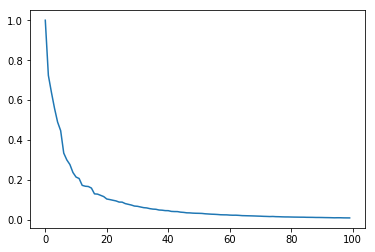

In [30]:
# All training data (plot c)
# print(train_data)
covariance_matrix = np.cov(train_data.T)
# print(covariance_matrix)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values = (eigen_values-np.min(eigen_values))/(np.max(eigen_values)-np.min(eigen_values))

# print(eigen_values)
x = range(0,100)
plt.plot(x,eigen_values[0:100])
plt.show()


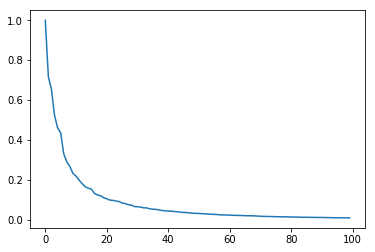

In [31]:
# Randomly selected 50% of the training data (plot d)
nums = np.random.randint(0,6000,size=3000)
arr = train_data[nums]

# # print(np.min(arr))
covariance_matrix = np.cov(arr.T)
# print(covariance_matrix)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values = (eigen_values-np.min(eigen_values))/(np.max(eigen_values)-np.min(eigen_values))

# print(eigen_vectors)
# print(eigen_values)
x = range(0,100)
plt.plot(x,eigen_values[0:100])
plt.show()

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

Ans---
1. Plots a and b are not much different as only a single kind of distribution is there.

2. Plots b and c are quite different as c comprises of examples from multiple classes and thus having a wider spectrum.


3. Ranks
    a-5
    b-5
    c-15
    d-15
---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
Ans--

1. There can be 2^784 images possible.  1.017458e+236

2. Approximately 0 percent.

3. The eign values will be all large. Since there will be distribution along all the vectors.
---
---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
Ans--

The eigen values do not change since the matrix just rotates so the eigen vectors change their orientation but the spread remains the same.Orthonormal matrix preserves angles and length.

---

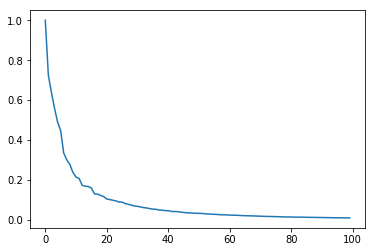

In [32]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.
n, m = 784, 784

H = np.random.rand(n, m)
Q, R = np.linalg.qr(H)
# print(np.matmul(Q,np.transpose(Q)))
new = np.matmul(train_data,Q)
covariance_matrix = np.cov(new,rowvar=False)
# print(covariance_matrix)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values = (eigen_values-np.min(eigen_values))/(np.max(eigen_values)-np.min(eigen_values))

# print(eigen_values)
x = range(0,100)
plt.plot(x,eigen_values[0:100])
plt.show()
# code goes here

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
Ans--

Then only the first 1 or 2 columns of the original matrix will be there in the final matrix. So there will be only 1-2 dimensions across which the data varies. Thus there will be 1-2 non zero eign values and rest will be zeroes.

---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

/home/killer00/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


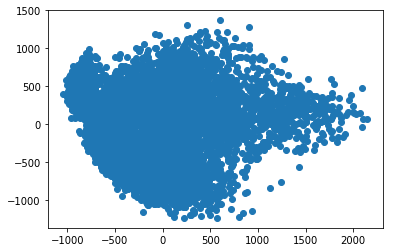

In [33]:
# Plotting code here
covariance_matrix = np.cov(train_data.T)
# print(covariance_matrix)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
# print(eigen_values)
p = np.zeros((2,train_data.shape[0]))
# print(p.shape)
for i in range(2):
    p[i,:] = (eigen_vectors[:,i].T).dot((train_data-np.mean(train_data,axis=0)).T)
#     print(p.shape)
plt.scatter(p[0,:],p[1,:])

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [34]:
# Print accuracy on the test set using MLE
my_cov = np.cov(train_data,rowvar=False)
eig_vals ,eig_vecs = np.linalg.eigh(my_cov)

idx = eig_vals.argsort()[::-1]   
eig_vecs = eig_vecs[:,idx]

proj_data = np.matmul(train_data,eig_vecs[:,0:30])
proj_test_data = np.matmul(test_data,eig_vecs[:,0:30])

no_of_train_samples = proj_data.shape[0]
no_of_test_samples = proj_test_data.shape[0]
no_of_dims = proj_data.shape[1]
no_of_classes = 10
means = np.empty((no_of_classes,no_of_dims))
covs = np.empty((no_of_classes,no_of_dims,no_of_dims))
dets = np.empty((no_of_classes))
invs = np.empty((no_of_classes,no_of_dims,no_of_dims))

classes = np.empty((10,600,no_of_dims))
itrs = np.zeros(no_of_classes)

# print(classes.shape)
for i in range(0,no_of_train_samples):
    for j in range(0,no_of_classes):
        if(j == (train_labels[i])):
            class_num = int(j)
            row_num = int(itrs[class_num])
            classes[class_num][row_num] = proj_data[i]
            itrs[class_num] = itrs[class_num] + 1
            break

            
##STEP 0 AND 1 ARE DONE
## COMPUTING THE MEANS AND COVARIANCES.

# print(itrs)


for i in range(0,no_of_classes):
    means[i] = np.mean(classes[i],axis=0)
    covs[i] = np.cov(classes[i],rowvar=False)
    dets[i] = np.sqrt(np.linalg.det(covs[i]))
    invs[i] = (np.linalg.inv(covs[i]))
    

ans = np.empty(no_of_test_samples)

for i in range(0,no_of_test_samples):
    pdfs = np.zeros(no_of_classes)
    
    for j in range(0,no_of_classes):
        
        temp = np.matmul((proj_test_data[i]-means[j]), invs[j])
        temp_transpose = np.transpose((proj_test_data[i]-means[j]))
        
        exp = -(np.matmul(temp,temp_transpose )) / 2
        pdfs[j] = np.exp(exp) / dets[j]
    
    ans[i] = np.argmax(pdfs)

count = 0
for i in range(0,no_of_test_samples):
    if (ans[i] == test_labels[i]):
        count = count + 1
     
print("Accuracy with MLE=" , ((count/float(no_of_test_samples))*100))


Accuracy with MLE= 94.8


In [35]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)
ans = np.empty(no_of_test_samples)
count = 0

for i in range(0,no_of_test_samples):
    pdfs = np.zeros(no_of_classes)
    
    for j in range(0,no_of_classes):
        
        temp = np.matmul((proj_test_data[i]-means[j]), invs[j])
        temp_transpose = np.transpose((proj_test_data[i]-means[j]))
        exp = -(np.matmul(temp,temp_transpose )) / 2
        pdfs[j] = np.exp(exp) / dets[j]
    
    ans[i] = np.argmax(pdfs)

for i in range(0,no_of_test_samples):
    if (ans[i] == test_labels[i]):
        count = count + 1
     
print("Accuracy with MAP =" , ((count/float(no_of_test_samples))*100))


Accuracy with MAP = 94.8


In [36]:
# Print accuracy using Bayesian pairwise majority voting method
ans = np.empty(no_of_test_samples)

for i in range(no_of_test_samples):
    votes = np.zeros(no_of_classes)
    for c1 in range(9):
        for c2 in range(c1+1, 10):
            cov = np.add(covs[c1],covs[c2]) / 2
            det = np.sqrt(np.linalg.det(cov))
            inv = np.linalg.inv(cov)
            temp_transpose = np.transpose(proj_test_data[i]-means[c1])
            temp_transpose2 = np.transpose(proj_test_data[i]-means[c2])
            
            exp1,exp2= (-(np.matmul(np.matmul((proj_test_data[i]-means[c1]), inv), temp_transpose)) / 2),(-(np.matmul(np.matmul((proj_test_data[i]-means[c2]), inv),temp_transpose2)) / 2)
            if (((np.exp(exp1) / det)) > ((np.exp(exp2) / det))):
                votes[c1] = votes[c1] + 1
            elif (((np.exp(exp1) / det)) < ((np.exp(exp2) / det))):
                votes[c2] = votes[c2] + 1
            else:
                votes[c1],votes[c2] = (votes[c1] + 1),(votes[c2] + 1)
                
    ans[i] = np.argmax(votes)

count = 0
for i in range(0,no_of_test_samples):
    if (ans[i] == test_labels[i]):
        count = count + 1
     
print("Accuracy with Bayesian Pairwise =" , ((count/float(no_of_test_samples))*100))

Accuracy with Bayesian Pairwise = 88.4


In [37]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
ans = np.empty(no_of_test_samples)
count = 0

for i in range(no_of_test_samples):
    votes = np.zeros(no_of_classes)
    for c1 in range(9):
        for c2 in range(c1+1, 10):
            temp_diff = means[c1] - proj_test_data[i]
            p1 = np.sum((np.square(temp_diff)))
            p2 = np.sum((np.square(means[c2] - proj_test_data[i])))
            if (p1 > p2):
                votes[c2] = votes[c2] + 1
            elif (p1 < p2):
                votes[c1] = votes[c1] + 1
            else:
                votes[c1],votes[c2] = (votes[c1] + 1),(votes[c2] + 1)
                
    ans[i] = np.argmax(votes)

for i in range(0,no_of_test_samples):
    if (ans[i] == test_labels[i]):
        count = count + 1
     
print("Accuracy with Simple Perpendicular =" , ((count/float(no_of_test_samples))*100))

Accuracy with Simple Perpendicular = 75.3


### 1.3.3 Question 4
Compare performances and salient observations

---
Ans--

1. In MLE we calculate the likelhood of a test sample belonging to a class i.e P(w<sub>i</sub>|x) and it is the best method for calculating accuracy.
2. The notion of prior probability is used in MAP and from that we calculate the posterior probability using the Bayes Rule . We calculate P(x|w<sub>i</sub>) = P(w<sub>i</sub>|x) * P(x). Liklehood is known. P(x) (prior) is 1/10 , since it's x has equal distribution among all the classes.
3. Accuracy in the Baysian pairwise is better than the Perpendicular method and worse than the MLE and MAP methods.
4. In the simple perpendicular bisector algorithm we calculate the distance of the point from the means, where the distance is less , that class gets the vote and vice-versa

---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [41]:
# Your code here
# Print accuracies with K = 1, 3, 7

ans1 = np.empty(test_data.shape[0])
ans3 = np.empty(test_data.shape[0])
ans7 = np.empty(test_data.shape[0])

for i in range(0,test_data.shape[0]):
    test = test_data[i]
    
    array = np.asarray(np.sum(np.square(train_data-test),axis=1))
    array = np.sqrt(array)
    
    ind = array.argsort()[::1]
    array = array[ind]
#     print(array)
    labels = train_labels[ind]
#     print(labels)

##  k == 1 
    ans1[i] = labels[0]
    
##  k == 3
    count = [0 for j in range(10)]
    for j in range(3):
        count[int(labels[j])] = count[int(labels[j])] + 1
    maxi = -1
    ind = int(labels[0])
    for j in range(10):
        if count[j] > maxi:
            maxi = count[j]
            ind = j
    ans3[i] = int(ind)

##  k == 7
    count = [0 for j in range(10)]
    for j in range(3):
        count[int(labels[j])] = count[int(labels[j])] + 1
    maxi = -1
    ind = int(labels[0])
    for j in range(10):
        if count[j] > maxi:
            maxi = count[j]
            ind = j
    ans7[i] = int(ind)

    
## Print Answer
count = 0
for i in range(test_data.shape[0]):
    if (ans1[i] == test_labels[i]):
        count = count + 1
print(count/float(test_data.shape[0])*100)


count = 0
for i in range(test_data.shape[0]):
#     print(test_labels[i])
#     print(ans3[i])
    if ans3[i] == test_labels[i]:
        count = count + 1
print(count/float(test_labels.shape[0])*100)

count = 0
for i in range(test_data.shape[0]):
    if ans7[i] == test_labels[i]:
        count = count + 1
print(count/float(test_labels.shape[0])*100)

    

90.7
91.60000000000001
91.60000000000001


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

Ans--

1. The accuracies are not same since the class may vary as k increases/decreases.

2. K should not be very small otherwise there will be significant contribution of noise, also when k increases largely the computational overload increases and also there is a chance that model overfits. For identifying the best  K  , we split the training data into a validation set and traning set (8:2) ratio. Then test for different k values on the validation set and finally take that k , which provides the best accuracy.

---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [42]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [43]:
#Code Goes here

no_of_train_samples = train_data.shape[0]
k = 3
knn = np.empty((no_of_train_samples,k))

no_of_test_samples = mixed_data.shape[0]

for i in range(0,no_of_train_samples):
    diff_mat = np.square(train_data - train_data[i])
    diff_arr = np.sqrt((np.asarray((np.sum(diff_mat,axis=1).tolist()))))
    idx = diff_arr.argsort()[::1]   
    diff_arr = diff_arr[idx]
    knn[i] = diff_arr[1:k+1]
    
    
for i in range(0,no_of_test_samples):
    
    
    diff_mat = np.square(train_data - mixed_data[i])
    diff_arr = np.sqrt((np.asarray(np.sum(diff_mat,axis=1).tolist())))
    
    cc = 0
    
    for ii in range(0,no_of_train_samples):
        
        if(diff_arr[ii] <= knn[ii][k-1]):
            cc = cc + 1
        
    
    if (cc < 1):
        print("Point ",i , "is an outlier")
    else:
        print("Point ",i , "is not an outlier")
        
 
    

Point  0 is an outlier
Point  1 is not an outlier
Point  2 is an outlier
Point  3 is not an outlier
Point  4 is an outlier
Point  5 is not an outlier
Point  6 is an outlier
Point  7 is an outlier
Point  8 is not an outlier
Point  9 is an outlier
Point  10 is not an outlier
Point  11 is an outlier
Point  12 is not an outlier
Point  13 is not an outlier
Point  14 is not an outlier
Point  15 is not an outlier
Point  16 is not an outlier
Point  17 is not an outlier
Point  18 is an outlier
Point  19 is not an outlier


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
Ans--


1. Firstly all the train and test labels will have to be assigned a neatness score. And each class will have a range
2. We take the test point and compute distances from all the points and sort it.
3. We now pick the k nearest neighbours.
4. Now we divide the label value of each of the knn by their corresponding distances to have a weighted distribution.
5. We sum up the values and find the label of the test sample.

---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [44]:
# Your code here
# Your code here

train_labels_reg,test_labels_reg = train_labels / float(10),test_labels / float(10)

no_of_test_samples = test_data.shape[0]
k_ans = np.empty(no_of_test_samples)


for i in range(0,no_of_test_samples):
    row = test_data[i]
    
    ## distances are calulcated and sorted.
    diff_arr = np.sum((np.square(train_data - row)),axis=1).tolist()
    diff_arr = np.asarray(diff_arr)
    diff_arr = np.sqrt(diff_arr)

    diff_arr = diff_arr[(diff_arr.argsort()[::1])]
    idx = diff_arr.argsort()[::1]   
    sorted_labels = train_labels_reg[idx]

    ## for any k. compute the neatness of the sample.
    k = 3
    denom = diff_arr[k-1]
    neatness = 0
    for ii in range(0,k):
        diff_arr[ii] = diff_arr[ii] / float(denom)
        neatness = neatness + (sorted_labels[ii] / float(diff_arr[ii]))
        
    neatness = neatness / float(k)
    
    k_ans[i] = neatness

# print(k_ans)
error = 0
for i in range(0,no_of_test_samples):
    error = error + abs(k_ans[i] - test_labels_reg[i])


error = error / float(no_of_test_samples)

print("mean absolute error is:",error)



mean absolute error is: 0.26689690425757173


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---